In [230]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [231]:
data16=pd.read_excel("AQI 2016 (1).xls")

In [232]:
data17=pd.read_excel("AQI 2017.xlsx")

In [233]:
data18=pd.read_excel("2018_AQI.xlsx")

In [234]:
data19=pd.read_excel("2019_AQI.xlsx")

In [235]:
data20=pd.read_excel("2020_AQI.xlsx")

In [236]:
data21=pd.read_excel("2021_AQI.xlsx")

In [237]:
data22=pd.read_excel("2022_AQI.xlsx")

In [238]:
data22

,Location,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Nizamabad,56,59.000000,64.000000,58.000000,56.222222,54,46.000000,53,54,63,56,59
1,Adilabad,54,55.000000,56.000000,65.000000,60.148148,58,48.000000,56,56,65,58,62
2,"Kuda, warangal",58,64.000000,49.105826,66.173930,53.704530,72,40.428571,43,41,64,49,116
3,"Mee-Seva, Warangal",73,72.514053,76.057747,60.080031,77.094650,85,47.268637,56,48,64,94,94
4,Karimnagar,82,90.333333,95.666667,69.926215,76.241282,89,69.197791,55,58,63,101,126
5,Khammam,80,78.079300,76.518519,79.365731,76.611111,81,72.500000,58,42,57,78,115


# Dataset of Karimnagar

In [239]:
Karimnagar_data=list(data16.T[4][1:-6])+list(data17.T[4][1:-1])+list(data18.T[4][1:])+list(data19.T[4][1:])+list(data20.T[4][1:])+list(data21.T[4][1:])+list(data22.T[4][1:])

dt=Karimnagar_data

dt

[69.22222222222223,
 59.125,
 44.0,
 62.19444444444445,
 52.25,
 48.111111111111114,
 31.604166666666668,
 35.51851851851851,
 31.0,
 56.2,
 68.77777777777777,
 84,
 83.77777777777777,
 74.68518518518518,
 85.52083333333333,
 78.85185185185185,
 81.66666666666667,
 59.44444444444444,
 55.333333333333336,
 54.70833333333333,
 61.55555555555556,
 71.0,
 90.53703703703702,
 89.96296296296298,
 111.444444444444,
 87.2222222222222,
 88.6666666666667,
 99.5555555555556,
 99.7777777777778,
 99.8888888888889,
 88.8571428571429,
 90.8571428571429,
 99.6666666666667,
 97.7777777777778,
 106.444444444444,
 100,
 104.333333333333,
 102.0,
 103.333333333333,
 109.142857142857,
 103.222222222222,
 99.4444444444444,
 99.5555555555556,
 99.375,
 96.75,
 102.0,
 104.555555555556,
 112.222222222222,
 110.666666666667,
 114.0,
 110.0,
 39.0,
 72,
 58.3333333333333,
 114,
 70.0,
 96,
 137,
 113.555555555556,
 108.0,
 109.625,
 110,
 69,
 73,
 68,
 72,
 57,
 64,
 65.521923293808,
 68,
 73,
 82.0,
 82,
 90.

In [240]:
L=['1-1-2016','1-2-2016','1-3-2016','1-4-2016','1-5-2016','1-6-2016','1-7-2016','1-8-2016','1-9-2016','1-10-2016','1-11-2016','1-12-2016','1-1-2017','1-2-2017','1-3-2017','1-4-2017','1-5-2017','1-6-2017','1-7-2017','1-8-2017','1-9-2017','1-10-2017','1-11-2017','1-12-2017']
L=L+['1-1-2018','1-2-2018','1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018','1-9-2018','1-10-2018','1-11-2018','1-12-2018']
L=L+['1-1-2019','1-2-2019','1-3-2019','1-4-2019','1-5-2019','1-6-2019','1-7-2019','1-8-2019','1-9-2019','1-10-2019','1-11-2019','1-12-2019']
L=L+['1-1-2020','1-2-2020','1-3-2020','1-4-2020','1-5-2020','1-6-2020','1-7-2020','1-8-2020','1-9-2020','1-10-2020','1-11-2020','1-12-2020']
L=L+['1-1-2021','1-2-2021','1-3-2021','1-4-2021','1-5-2021','1-6-2021','1-7-2021','1-8-2021','1-9-2021','1-10-2021','1-11-2021','1-12-2021']
L=L+['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
L

['1-1-2016',
 '1-2-2016',
 '1-3-2016',
 '1-4-2016',
 '1-5-2016',
 '1-6-2016',
 '1-7-2016',
 '1-8-2016',
 '1-9-2016',
 '1-10-2016',
 '1-11-2016',
 '1-12-2016',
 '1-1-2017',
 '1-2-2017',
 '1-3-2017',
 '1-4-2017',
 '1-5-2017',
 '1-6-2017',
 '1-7-2017',
 '1-8-2017',
 '1-9-2017',
 '1-10-2017',
 '1-11-2017',
 '1-12-2017',
 '1-1-2018',
 '1-2-2018',
 '1-3-2018',
 '1-4-2018',
 '1-5-2018',
 '1-6-2018',
 '1-7-2018',
 '1-8-2018',
 '1-9-2018',
 '1-10-2018',
 '1-11-2018',
 '1-12-2018',
 '1-1-2019',
 '1-2-2019',
 '1-3-2019',
 '1-4-2019',
 '1-5-2019',
 '1-6-2019',
 '1-7-2019',
 '1-8-2019',
 '1-9-2019',
 '1-10-2019',
 '1-11-2019',
 '1-12-2019',
 '1-1-2020',
 '1-2-2020',
 '1-3-2020',
 '1-4-2020',
 '1-5-2020',
 '1-6-2020',
 '1-7-2020',
 '1-8-2020',
 '1-9-2020',
 '1-10-2020',
 '1-11-2020',
 '1-12-2020',
 '1-1-2021',
 '1-2-2021',
 '1-3-2021',
 '1-4-2021',
 '1-5-2021',
 '1-6-2021',
 '1-7-2021',
 '1-8-2021',
 '1-9-2021',
 '1-10-2021',
 '1-11-2021',
 '1-12-2021',
 '1-1-2022',
 '1-2-2022',
 '1-3-2022',
 '1-4-2

In [241]:
df=pd.DataFrame()
df.reset_index()
df["Date"]=L
df["AQI"]=dt
df

,Date,AQI
0,1-1-2016,69.222222
1,1-2-2016,59.125000
2,1-3-2016,44.000000
3,1-4-2016,62.194444
4,1-5-2016,52.250000
...,...,...
79,1-8-2022,55.000000
80,1-9-2022,58.000000
81,1-10-2022,63.000000
82,1-11-2022,101.000000


In [242]:
df1=df[["Date","AQI"]]
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%d-%Y').dt.strftime('%d-%Y')

df["Date"]=pd.to_datetime(df["Date"])
print(df1)
x=df["Date"]
y=df["AQI"]
#plt.plot(x,y)
df=df.set_index("Date")

       Date         AQI
0   01-2016   69.222222
1   02-2016   59.125000
2   03-2016   44.000000
3   04-2016   62.194444
4   05-2016   52.250000
..      ...         ...
79  08-2022   55.000000
80  09-2022   58.000000
81  10-2022   63.000000
82  11-2022  101.000000
83  12-2022  126.000000

[84 rows x 2 columns]


In [243]:
df1

,Date,AQI
0,01-2016,69.222222
1,02-2016,59.125000
2,03-2016,44.000000
3,04-2016,62.194444
4,05-2016,52.250000
...,...,...
79,08-2022,55.000000
80,09-2022,58.000000
81,10-2022,63.000000
82,11-2022,101.000000


In [244]:
df1["Date"]

0     01-2016
1     02-2016
2     03-2016
3     04-2016
4     05-2016
       ...   
79    08-2022
80    09-2022
81    10-2022
82    11-2022
83    12-2022
Name: Date, Length: 84, dtype: object

# AQI levels of Karimnagar between 2016 and 2022

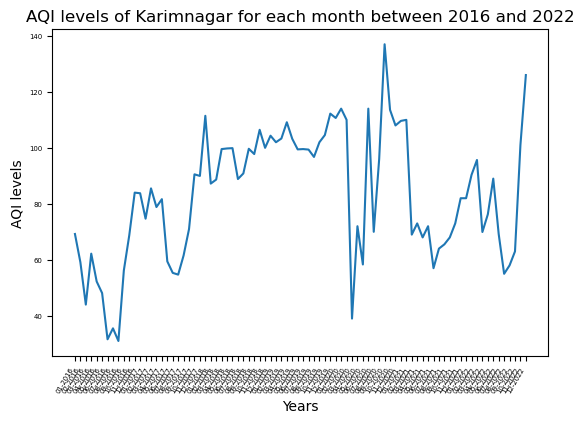

In [245]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],df1["AQI"], marker='', linestyle='-')

fig.autofmt_xdate()


plt.title("AQI levels of Karimnagar for each month between 2016 and 2022")
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(5)
plt.show()

In [246]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [247]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(df)
print("The p-value of the dataset is",dfa[1])

The p-value of the dataset is 0.008224451015005652


In [248]:
#plt.plot(df)

In [249]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(df["AQI"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=713.829, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=709.957, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=710.167, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=711.957, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=711.928, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=711.792, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=713.650, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=708.154, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=710.122, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=709.973, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=708.374, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=711.837, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.961 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -352.077
Date:                Sat, 04 Mar 2023   AIC                            708.154
Time:                        18:42:14   BIC                            712.992
Sample:                             0   HQIC                           710.098
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2620      0.093     -2.821      0.005      -0.444      -0.080
sigma2       282.8880     24.688     11.459      0.000     234.501     331.275
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.94
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -0.42
Prob(H) (two-sided):                  0.08   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [250]:
'''df.sort_index(inplace=True)
df'''

'df.sort_index(inplace=True)\ndf'

In [251]:
train=df.iloc[:-12]
test=df.iloc[-12:]

# ARIMA model

In [252]:
from statsmodels.tsa.arima.model import ARIMA 
print(train)
model =ARIMA(train,order=(1,1,0),seasonal_order=(7,1,7,12))
model_fit =model.fit()
model_fit.summary()

                  AQI
Date                 
2016-01-01  69.222222
2016-01-02  59.125000
2016-01-03  44.000000
2016-01-04  62.194444
2016-01-05  52.250000
...               ...
2021-01-08  64.000000
2021-01-09  65.521923
2021-01-10  68.000000
2021-01-11  73.000000
2021-01-12  82.000000

[72 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                               
============================================================================================================
Dep. Variable:                                                  AQI   No. Observations:                   72
Model:             ARIMA(1, 1, 0)x(7, 1, [1, 2, 3, 4, 5, 6, 7], 12)   Log Likelihood                -254.235
Date:                                              Sat, 04 Mar 2023   AIC                            540.470
Time:                                                      18:43:04   BIC                            573.711
Sample:                                                           0   HQIC                           553.446
                                                               - 72                                         
Covariance Type:                                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4236      0.297     -1.426      0.154      -1.006       0.158
ar.S.L12      -0.3171   1.27e+04   -2.5e-05      1.000   -2.48e+04    2.48e+04
ar.S.L24       0.2166   9632.522   2.25e-05      1.000   -1.89e+04    1.89e+04
ar.S.L36      -0.1668   4529.619  -3.68e-05      1.000   -8878.058    8877.724
ar.S.L48      -0.4548   1.39e+04  -3.28e-05      1.000   -2.72e+04    2.72e+04
ar.S.L60       0.2312   1.13e+04   2.04e-05      1.000   -2.22e+04    2.22e+04
ar.S.L72       0.5876    3.3e+04   1.78e-05      1.000   -6.46e+04    6.47e+04
ar.S.L84      -0.1611   3305.525  -4.87e-05      1.000   -6478.871    6478.548
ma.S.L12      -1.2027   2.71e+05  -4.43e-06      1.000   -5.32e+05    5.32e+05
ma.S.L24      -0.3642   1.89e+04  -1.93e-05      1.000    -3.7e+04     3.7e+04
ma.S.L36       0.7145   1.57e+05   4.56e-06      1.000   -3.07e+05    3.07e+05
ma.S.L48       0.4538   1.63e+05   2.78e-06      1.000    -3.2e+05     3.2e+05
ma.S.L60      -0.1921   5.74e+04  -3.35e-06      1.000   -1.12e+05    1.12e+05
ma.S.L72      -1.0308   2.81e+05  -3.67e-06      1.000   -5.51e+05    5.51e+05
ma.S.L84       0.7292   1.11e+05   6.56e-06      1.000   -2.18e+05    2.18e+05
sigma2        57.8386   7961.731      0.007      0.994   -1.55e+04    1.57e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                80.75
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               6.85   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+19. Standard errors may be unstable.
"""

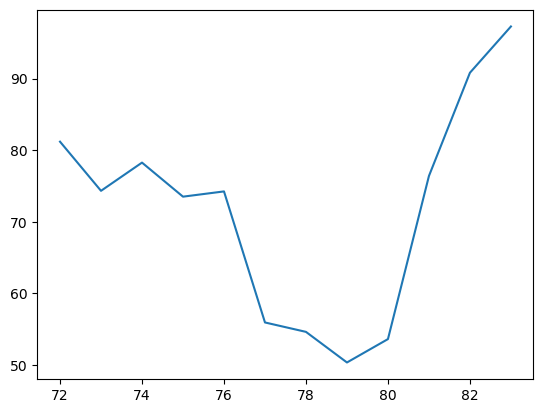

In [253]:
pred_new=model_fit.forecast(12)
plt.plot(pred_new)

In [254]:
#res.index

In [255]:
time_list=['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
res=pd.DataFrame(pred_new)
res["Date"]=time_list
a=list(res['predicted_mean'])
res["AQI"]=a
res=res.drop(["predicted_mean"],axis=1)
res["Date"]=pd.to_datetime(res["Date"])
df2=res[["Date","AQI"]]
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")

In [256]:
final_data =train
pred_data=final_data.append(res)

In [257]:
#df2

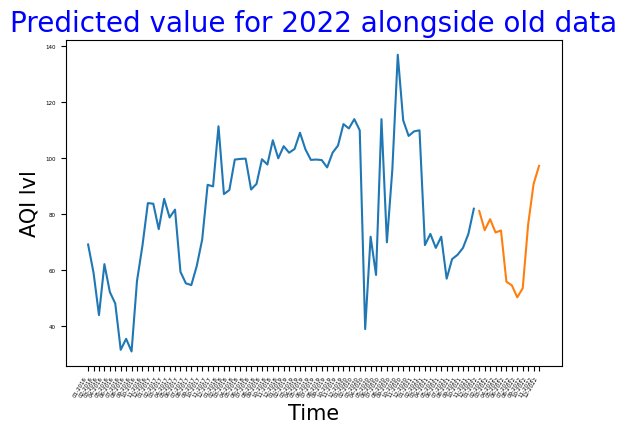

In [264]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"][:-12],df1["AQI"][:-12], marker='', linestyle='-')
ax.plot_date(df2["Date"],df2["AQI"] ,marker='', linestyle='-')
fig.autofmt_xdate()


plt.title("Predicted value for 2022 alongside old data",fontsize = 20,c='b')
plt.xlabel("Time",fontsize = 15)
plt.ylabel("AQI lvl",fontsize = 15)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()



# Performance of the model

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_new,test["AQI"]))
ame=mean_absolute_error(pred_new,test["AQI"])

print("Average Temperature         : ",df['AQI'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  82.90724099437674
Root mean Square value      :  15.89561777519357
Mean absolute Error         :  12.401868174327262


# Forcasting for 2023

In [260]:
model =ARIMA(df,order=(1,1,0),seasonal_order=(7,1,7,12))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                               
============================================================================================================
Dep. Variable:                                                  AQI   No. Observations:                   84
Model:             ARIMA(1, 1, 0)x(7, 1, [1, 2, 3, 4, 5, 6, 7], 12)   Log Likelihood                -305.983
Date:                                              Sat, 04 Mar 2023   AIC                            643.965
Time:                                                      18:44:00   BIC                            680.168
Sample:                                                           0   HQIC                           658.362
                                                               - 84                                         
Covariance Type:                                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3632      0.183     -1.983      0.047      -0.722      -0.004
ar.S.L12      -0.4243   3042.439     -0.000      1.000   -5963.494    5962.646
ar.S.L24       0.0954   1056.962   9.02e-05      1.000   -2071.512    2071.703
ar.S.L36      -0.0498   1497.628  -3.33e-05      1.000   -2935.347    2935.248
ar.S.L48       0.0280   1206.848   2.32e-05      1.000   -2365.351    2365.407
ar.S.L60       0.4862   3691.000      0.000      1.000   -7233.741    7234.713
ar.S.L72       0.8318   7071.727      0.000      1.000   -1.39e+04    1.39e+04
ar.S.L84      -0.0126   1211.899  -1.04e-05      1.000   -2375.291    2375.265
ma.S.L12      -0.8533   2.81e+04  -3.03e-05      1.000   -5.51e+04    5.51e+04
ma.S.L24       0.1535   2.43e+04   6.33e-06      1.000   -4.76e+04    4.76e+04
ma.S.L36       0.0811   1.31e+04   6.21e-06      1.000   -2.56e+04    2.56e+04
ma.S.L48      -0.0803   1.16e+04  -6.92e-06      1.000   -2.27e+04    2.27e+04
ma.S.L60       0.5817   3.68e+04   1.58e-05      1.000   -7.22e+04    7.22e+04
ma.S.L72      -0.9309   4.33e+04  -2.15e-05      1.000   -8.48e+04    8.48e+04
ma.S.L84       0.2750   1.43e+04   1.93e-05      1.000   -2.79e+04    2.79e+04
sigma2        58.6962   1333.778      0.044      0.965   -2555.460    2672.852
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                48.03
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.49e+19. Standard errors may be unstable.
"""

In [261]:
pred_new =model_fit.forecast(12)
print("The predicted AQI values of each month of 2023 is:\n",pd.DataFrame(pred_new))

The predicted AQI values of each month of 2023 is:
     predicted_mean
84      130.034911
85      122.477469
86      117.553839
87      103.497457
88      111.543958
89      113.816963
90      105.079982
91      101.600581
92      114.623145
93      103.261725
94      118.244553
95      114.996294


In [262]:
res=pd.DataFrame(pred_new)
res.columns=["AQI"]
time_list=['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
res["AQI"]=pred_new
res["Date"]=time_list
res["Date"]=pd.to_datetime(res["Date"])
res['Date'] = pd.to_datetime(res['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")
res

,AQI
Date,
01-2023,130.034911
02-2023,122.477469
03-2023,117.553839
04-2023,103.497457
05-2023,111.543958
06-2023,113.816963
07-2023,105.079982
08-2023,101.600581
09-2023,114.623145


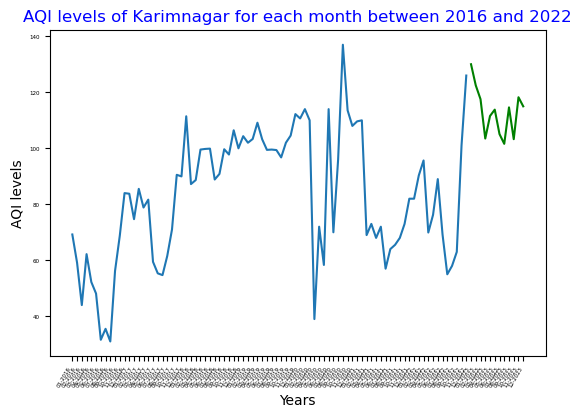

In [263]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')
plt.plot(res,c='g')

fig.autofmt_xdate()


plt.title("AQI levels of Karimnagar for each month between 2016 and 2022",c='b')
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()
